In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd '/content/drive/MyDrive'

/content/drive/MyDrive


In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 304kB/s 
     |████████████████████████████████| 92kB 14.6MB/s 
     |████████████████████████████████| 460kB 69.6MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


# RNN(LSTM) 함수화

In [ ]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import re
import matplotlib.pyplot as plt
from konlpy.tag import Okt
import tensorflow as tf
import os

In [ ]:
document_df1 = pd.read_csv('./01_원피스_attrangs.csv', encoding='utf-8')
document_df2 = pd.read_csv('./02_스커트_attrangs.csv', encoding='utf-8')
document_df3 = pd.read_csv('./02_치마_attrangs.csv', encoding='utf-8')
document_df4 = pd.read_csv('./09_셔츠_attrangs.csv', encoding='utf-8')

In [ ]:
document_df = pd.concat([document_df1,document_df2,document_df3,document_df4])
len(document_df)

2683

In [ ]:
document_df.isna().sum()

Unnamed: 0    0
keyword       0
title         0
text          8
url           0
dtype: int64

In [ ]:
# null값 제거
document_df = document_df.dropna()
print(document_df.isna().sum())

Unnamed: 0    0
keyword       0
title         0
text          0
url           0
dtype: int64


In [ ]:
df = document_df['text']
df.head()

0        "코디 걱정 끝-! 단숨에 예뻐지는 슬림핏 배색 원피스♥-"   ♥ MD C...
1        "페미닌함 가득 담은♥ 레이어드 뷔스티에 원피스-"    ♥ MD COMME...
2        "로맨틱 플리츠 한다발!♥ 사랑스러운 무드의 퍼프 반팔 롱 원피스-"    ...
3        "일상도 특별하게♥ 페미닌한 플리츠배색의 롱 플레어원피스-"    ♥ MD ...
4        "안입은듯 편하게!♥ 꾸안꾸 무드의 플레어 나시 원피스-"    ♥ MD C...
Name: text, dtype: object

In [ ]:
# re.sub으로 불용어 교체
m_text = []
for t in tqdm(df):
    # t = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "",str(t))
    t = re.sub('아뜨', "",str(t))
    t = re.sub('아띠', "",str(t))
    t = re.sub('랑스', "",str(t))
    t = re.sub('"', "",str(t))
    t = re.sub('  ', "",str(t))
    m_text.append(t)

In [ ]:
# 전처리된 텍스트(m_text)를 다시 df(데이터프레임)에 넣는다
for i in tqdm(range(len(m_text))):
    df[i] = m_text[i]
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying

0        코디 걱정 끝-! 단숨에 예뻐지는 슬림핏 배색 원피스♥-   ♥ MD COM...
1        페미닌함 가득 담은♥ 레이어드 뷔스티에 원피스-    ♥ MD COMMENT...
2        로맨틱 플리츠 한다발!♥ 사러운 무드의 퍼프 반팔 롱 원피스-    ♥ MD...
3        일상도 특별하게♥ 페미닌한 플리츠배색의 롱 플레어원피스-    ♥ MD CO...
4        안입은듯 편하게!♥ 꾸안꾸 무드의 플레어 나시 원피스-    ♥ MD COM...
Name: text, dtype: object

In [ ]:
# df.to_csv('mall.txt', index=False)

In [ ]:
# 읽은 다음 파이썬 2와 호환되도록 디코딩합니다.
text = open('/content/drive/MyDrive/mall.txt', 'rb').read().decode(encoding='utf-8')
# text = open('/content/drive/MyDrive/filter_긴팔티셔츠_text.txt', 'rb').read().decode(encoding='utf-8')

# 텍스트의 길이는 그 안에 있는 문자의 수입니다.
print ('텍스트의 길이: {}자'.format(len(text)))

텍스트의 길이: 3488593자


In [ ]:
# 텍스트의 처음 250자를 살펴봅니다
print(text[:250])

text
"    코디 걱정 끝-! 단숨에 예뻐지는 슬림핏 배색 원피스♥-   ♥ MD COMMENT 이건 보자마자 바로 님들께 보여드려야 겠다! 생각한 원피스에요♥ 바쁜 아침이나, 집 앞 데이트룩, 스니커즈나 샌들과도 이지하게 입기 좋은 베이직 니트 원피스 소개해드릴게요 :) 부드러우면서 유연한 니트 패브릭으로 기분 좋은 착용감을 선사드리며, 쫀~득 신축성으로 불편함이 전혀 없어요! 휘뚜루마뚜루~ 즐겨 입기 좋아 단품으로, 때로는 레이어드용으


In [ ]:
# 파일의 고유 문자수를 출력합니다.
vocab = sorted(set(text))
print ('고유 문자수 {}개'.format(len(vocab)))

고유 문자수 1230개


In [ ]:
# 고유 문자에서 인덱스로 매핑 생성
char2idx = {u:i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)

text_as_int = np.array([char2idx[c] for c in text])

In [ ]:
print('{')
for char,_ in zip(char2idx, range(20)):
    print('  {:4s}: {:3d},'.format(repr(char), char2idx[char]))
print('  ...\n}')

{
  '\n':   0,
  ' ' :   1,
  '!' :   2,
  '"' :   3,
  '#' :   4,
  '%' :   5,
  '&' :   6,
  "'" :   7,
  '(' :   8,
  ')' :   9,
  '*' :  10,
  '+' :  11,
  ',' :  12,
  '-' :  13,
  '.' :  14,
  '/' :  15,
  '0' :  16,
  '1' :  17,
  '2' :  18,
  '3' :  19,
  ...
}


In [ ]:
# 텍스트에서 처음 20개의 문자가 숫자로 어떻게 매핑되었는지를 보여줍니다
print ('{} ---- 문자들이 다음의 정수로 매핑되었습니다 ---- > {}'.format(repr(text[:20]), text_as_int[:20]))

'text\n"\xa0 \xa0 코디 걱정 끝-! ' ---- 문자들이 다음의 정수로 매핑되었습니다 ---- > [  80   66   84   80    0    3   88    1   88    1 1033  375    1  139
  882    1  245   13    2    1]


In [ ]:
# 단일 입력에 대해 원하는 문장의 최대 길이
seq_length = 50
examples_per_epoch = len(text)//seq_length

# 훈련 샘플/타깃 만들기
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

for i in char_dataset.take(10):
  print(idx2char[i.numpy()])

t
e
x
t


"
 
 
 
 


In [ ]:
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

for item in sequences.take(10):
  print(repr(''.join(idx2char[item.numpy()])))

'text\n"\xa0 \xa0 코디 걱정 끝-! 단숨에 예뻐지는 슬림핏 배색 원피스♥- \xa0 ♥ MD CO'
'MMENT 이건 보자마자 바로 님들께 보여드려야 겠다! 생각한 원피스에요♥ 바쁜 아침이나, '
'집 앞 데이트룩, 스니커즈나 샌들과도 이지하게 입기 좋은 베이직 니트 원피스 소개해드릴게요 '
':) 부드러우면서 유연한 니트 패브릭으로 기분 좋은 착용감을 선사드리며, 쫀~득 신축성으로 '
'불편함이 전혀 없어요! 휘뚜루마뚜루~ 즐겨 입기 좋아 단품으로, 때로는 레이어드용으로 자주 '
'손이 가는 데일리 원피스랍니다-♪♥ DETAIL TIP 입는 순간 부드럽게 바디를 감싸주는 '
'촉촉한 니트 패브릭의 미니 원피스예요 :) 깔끔한 카라넥에 트임을 더해 여성스러움이 더욱 느'
'껴지구요, 카라넥과 소매단에 배색을 더해주어 밋밋함 없는 은은한 포인트를 더했어요♥ 또한, '
'바디라인 곡선을 따라 부드럽게 핏되는 슬림핏 디자인으로 S라인 몸매를 완성해주며, 미니-미디'
' 기장으로 롱님들도 부담 없이 착용해보실 수 있답니다♥ COLOR TIP 컬러의 경우, 총 '


In [ ]:
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text
# seq_length(50글자)가 처음에 나오면 그 뒤로 한 글자 씩 밀리고 결과를 저장
dataset = sequences.map(split_input_target)

In [ ]:
for input_example, target_example in  dataset.take(1):
  print ('입력 데이터: ', repr(''.join(idx2char[input_example.numpy()])))
  print ('타깃 데이터: ', repr(''.join(idx2char[target_example.numpy()])))

입력 데이터:  'text\n"\xa0 \xa0 코디 걱정 끝-! 단숨에 예뻐지는 슬림핏 배색 원피스♥- \xa0 ♥ MD C'
타깃 데이터:  'ext\n"\xa0 \xa0 코디 걱정 끝-! 단숨에 예뻐지는 슬림핏 배색 원피스♥- \xa0 ♥ MD CO'


In [ ]:
for i, (input_idx, target_idx) in enumerate(zip(input_example[:5], target_example[:5])):
    print("{:4d}단계".format(i))
    print("  입력: {} ({:s})".format(input_idx, repr(idx2char[input_idx])))
    print("  예상 출력: {} ({:s})".format(target_idx, repr(idx2char[target_idx])))

   0단계
  입력: 2 (' ')
  예상 출력: 269 ('데')
   1단계
  입력: 269 ('데')
  예상 출력: 741 ('일')
   2단계
  입력: 741 ('일')
  예상 출력: 394 ('리')
   3단계
  입력: 394 ('리')
  예상 출력: 1021 ('한')
   4단계
  입력: 1021 ('한')
  예상 출력: 2 (' ')


In [ ]:
# 배치 크기
BATCH_SIZE = 64

# 데이터셋을 섞을 버퍼 크기
# (TF 데이터는 무한한 시퀀스와 함께 작동이 가능하도록 설계되었으며,
# 따라서 전체 시퀀스를 메모리에 섞지 않습니다. 대신에,
# 요소를 섞는 버퍼를 유지합니다).
BUFFER_SIZE = 10000 #버퍼사이즈에 따라서 학습률이 많이 달라지는 경우가 있음

# 데이터를 모델에 넣기 전에 buffer_size로 데이터를 섞고 배치 생성
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

dataset

<BatchDataset shapes: ((64, 50), (64, 50)), types: (tf.int64, tf.int64)>

In [ ]:
# 문자로 된 어휘 사전의 크기
vocab_size = len(vocab)

# 임베딩 차원
# 숫자 하나를 dim 크기의 dense vector로 만듦
# input_dim = 들어가는 숫자의 최댓값 / output_dim = 결과값이 몇 개로 나올지 정함
embedding_dim = 256

# RNN 유닛(unit) 개수
# unit = 레이어의 생성자에 전달된 인수 / 출력 공간의 차원
rnn_units = 512

In [ ]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
    model = tf.keras.Sequential([
                                 # vocab_size = input_dim / embedding = output_dim
        tf.keras.layers.Embedding(vocab_size, embedding_dim,
                                  batch_input_shape=[batch_size, None]),
        tf.keras.layers.LSTM(rnn_units,
                             return_sequences=True,
                             stateful=True,
                             recurrent_initializer='glorot_uniform'),
        tf.keras.layers.Dense(vocab_size)
  ])
    return model

In [ ]:
model = build_model(vocab_size = len(vocab),
                    embedding_dim=embedding_dim,
                    rnn_units=rnn_units,
                    batch_size=BATCH_SIZE)

In [ ]:
for input_example_batch, target_example_batch in dataset.take(1):
  example_batch_predictions = model(input_example_batch)
  print(example_batch_predictions.shape, "# (배치 크기, 시퀀스 길이, 어휘 사전 크기)")

(64, 50, 1230) # (배치 크기, 시퀀스 길이, 어휘 사전 크기)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (64, None, 256)           314880    
_________________________________________________________________
lstm (LSTM)                  (64, None, 512)           1574912   
_________________________________________________________________
dense (Dense)                (64, None, 1230)          630990    
Total params: 2,520,782
Trainable params: 2,520,782
Non-trainable params: 0
_________________________________________________________________


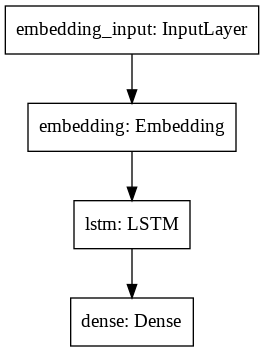

In [ ]:
from tensorflow import keras
keras.utils.plot_model(model, 'my_model.png')

In [ ]:
sampled_indices = tf.random.categorical(example_batch_predictions[0], num_samples=1)
sampled_indices = tf.squeeze(sampled_indices,axis=-1).numpy()

In [ ]:
sampled_indices

array([ 628, 1040,  369,  453,  335,  308,  515,  763, 1030,  497,  337,
        515,  211,  492,  616,  390,  141,  858,  422,  237,  599,  725,
        981,  809,  804,  539,   97,  836, 1049,  836,  335,  328,  524,
        293,  695,  632,  427,  522,  265,  866,  924,  924,  919,  342,
        470,  695,  862,  917,   23,  513,  111,  599,  949,  963,  324,
        800,  830,  498,  434,  949,  353,  548,  239,  743,  524,  981,
        665,  143,  701,  472,  984,  602,  839,  433,  168,  543,  590,
         25,  342,  710,  271,  139,  822,  194,   79,  752,  140,  206,
        631,  966,  369,  813,  884,  161,  584,  233, 1014,   21,  761,
        208])

In [ ]:
print("입력: \n", repr("".join(idx2char[input_example_batch[0]])))
print()
print("예측된 다음 문자: \n", repr("".join(idx2char[sampled_indices ])))

입력: 
 '러운 분위기를 가득 담은 핑크 로즈 패턴으로 완성된 롱드레스. 가벼운 쉬폰 소재감으로 여름 내내 함께 하실 수 있으며 숄더라인부터 허리까지 사선으로 이어지는 프릴 장식, 밑단의 셔'



NameError: ignored

In [ ]:
def loss(labels, logits):
  return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

example_batch_loss  = loss(target_example_batch, example_batch_predictions)
print("예측 배열 크기(shape): ", example_batch_predictions.shape, " # (배치 크기, 시퀀스 길이, 어휘 사전 크기")
print("스칼라 손실:          ", example_batch_loss.numpy().mean())

예측 배열 크기(shape):  (64, 50, 1230)  # (배치 크기, 시퀀스 길이, 어휘 사전 크기
스칼라 손실:           7.1152587


In [ ]:
model.compile(optimizer='adam', loss=loss, metrics=['acc'])

In [ ]:
# 체크포인트가 저장될 디렉토리
checkpoint_dir = './training_checkpoints'
# 체크포인트 파일 이름
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")
# callbacks.ModelCheckpoint를 사용하여 매 학습마다 좋은 결과를 그때그때 저장
checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

In [ ]:
history = model.fit(dataset, epochs=50, callbacks=[checkpoint_callback])

Epoch 1/50
1068/1068 [==============================] - 27s 23ms/step - loss: 3.2921 - acc: 0.4202
Epoch 2/50
1068/1068 [==============================] - 26s 24ms/step - loss: 1.5064 - acc: 0.6721
Epoch 3/50
1068/1068 [==============================] - 25s 23ms/step - loss: 1.3209 - acc: 0.7002
Epoch 4/50
1068/1068 [==============================] - 25s 23ms/step - loss: 1.2245 - acc: 0.7154
Epoch 5/50
1068/1068 [==============================] - 26s 24ms/step - loss: 1.1607 - acc: 0.7261
Epoch 6/50
1068/1068 [==============================] - 26s 24ms/step - loss: 1.1111 - acc: 0.7349
Epoch 7/50
1068/1068 [==============================] - 26s 23ms/step - loss: 1.0691 - acc: 0.7424
Epoch 8/50
1068/1068 [==============================] - 26s 23ms/step - loss: 1.0392 - acc: 0.7478
Epoch 9/50
1068/1068 [==============================] - 26s 23ms/step - loss: 1.0122 - acc: 0.7528
Epoch 10/50
1068/1068 [==============================] - 26s 23ms/step - loss: 0.9873 - acc: 0.7574
Epoch 11/

In [ ]:
tf.train.latest_checkpoint(checkpoint_dir)

'./training_checkpoints/ckpt_50'

In [ ]:
model = build_model(vocab_size, embedding_dim, rnn_units, batch_size=1)
# 체크포인트로 저장된 가중치를 불러오고 모델층에 입히기
model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
# 예측 단계를 간단히 유지하기 위해 배치크기를 1로 설정
model.build(tf.TensorShape([1, None]))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (1, None, 256)            314880    
_________________________________________________________________
lstm_3 (LSTM)                (1, None, 512)            1574912   
_________________________________________________________________
dense_3 (Dense)              (1, None, 1230)           630990    
Total params: 2,520,782
Trainable params: 2,520,782
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def generate_text(model, start_string):
  # 평가 단계 (학습된 모델을 사용하여 텍스트 생성)

  # 생성할 문자의 수
  num_generate = 1000

  # 시작 문자열을 숫자로 변환(벡터화)
  input_eval = [char2idx[s] for s in start_string]
  input_eval = tf.expand_dims(input_eval, 0)

  # 결과를 저장할 빈 문자열
  text_generated = []

  # 온도가 낮으면 더 예측 가능한 텍스트가 됩니다.
  # 온도가 높으면 더 의외의 텍스트가 됩니다.
  # 최적의 세팅을 찾기 위한 실험
  temperature = 0.2

  # 여기에서 배치 크기 == 1
  model.reset_states()
  for i in range(num_generate):
      predictions = model(input_eval)
      # 배치 차원 제거
      predictions = tf.squeeze(predictions, 0)

      # 범주형 분포를 사용하여 모델에서 리턴한 단어 예측
      predictions = predictions / temperature
      predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

      # 예측된 단어를 다음 입력으로 모델에 전달
      # 이전 은닉 상태와 함께
      input_eval = tf.expand_dims([predicted_id], 0)

      text_generated.append(idx2char[predicted_id])

  return (start_string + ''.join(text_generated))

In [ ]:
result_text = generate_text(model, start_string=u"롱 원피스")
result_text

'롱 원피스예요 :) 기솔모델처럼 데님 팬츠와 매치하시면 더욱 러블리하게 연출해도 너무 예쁘구요, 블라우스 등 다양한 아이템과 매치하기 좋아 추천드려요-! \xa0 ♥ DETAIL TIP 깔끔한 라운드넥 디자인의 가디건은 배색포인트와 스냅 버튼으로 오픈클로징 도와드릴게요:) \xa0 ♥ SIZE TIP FREE 사이즈로 준비되었으니 하단의 상세사이즈를 참고해주세요.44~55반 사이즈까지 추천드려요. *사이즈, 핏감은 체형에 따라 개인차가 있다는 점 감안해주세요:) \xa0 * L사이즈는 주문 제작으로 진행되어 입고가 있으며 허리 밴딩으로 편안한 착용감은 물론, 포켓 디테일로 실용성까지 챙긴 요 아이! 한 컬러 이상은 꼭 소장해 주세요♥ \xa0 ♥ DETAIL TIP 깔끔한 라운드넥 디자인의 가디건은 배색포인트와 스퀘어넥 디자인으로 여리여리한 실루엣을 연출해드리는 제품이에요. \xa0 ♥ SIZE TIP FREE 사이즈로 준비되었으니 하단의 상세사이즈를 참고해주세요.44~66 사이즈까지 추천드려요. *사이즈, 핏감은 체형에 따라 개인차가 있다는 점 감안해주세요:) \xa0 * L사이즈는 주문 제작으로 진행되어 입고가 있으며 허리 밴딩으로 편안하게 착용하실 수 있답니다. \xa0 ♥ SIZE TIP FREE 사이즈로 준비되었으니 하단의 상세사이즈를 참고해주세요.44~66 사이즈까지 추천드려요. *사이즈, 핏감은 체형에 따라 개인차가 있다는 점 감안해주세요:) \xa0 \xa0──────────────────────── MATERIAL (혼용률) : COTTON 100% 두께 : 얇음 , 비침 : 중간 신축 : 없음 , 안감 : 있음 세탁법 : 손세탁 드라이 단독세탁 세탁기금지 세탁건조기 사용불가 ──────────────────────── \xa0 \xa0 "\n"\xa0 \xa0 ♥ MD COMMENT\xa0 \xa0 봄, 가을 시즌에는 물론, 블랙 두컬러 모두 예뻐 사심 가득 담아 추천드릴게요! \xa0 ♥ DETAIL TIP 깔끔한 라운드넥 디자인의 가디건